In [19]:
import pandas as pd 
import numpy as np
import matplotlib
from scipy.stats import linregress
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display

In [20]:
dt_qzvpp=pd.read_pickle('data_hfmp2_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_hfmp2_def2_tzvp')
dt_sto3g=pd.read_pickle("data_hfmp2_sto3G")
dt_sto6g=pd.read_pickle("data_hfmp2_sto6G")
dt_321g=pd.read_pickle("data_hfmp2_321G")
dt_631g=pd.read_pickle("data_hfmp2_631G")
dt_aug=pd.read_pickle("data_hfmp2_aug")
dt_ccpvtz=pd.read_pickle("data_hfmp2_ccpvtz")

In [21]:
dt_ccpvtz[:10]

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,e_HF,e_mp2
0,0,1.3,cc-pVTZ,-198.269808,-200.900670,HAl,HeMg,2.630862,3.762205,-199.870264,1.600456,-200.826867,-200.881874
1,1,1.3,cc-pVTZ,-199.691268,-200.900670,HAl,HeMg,1.209402,3.762205,-199.870264,0.178996,-200.826867,-200.881874
2,2,1.3,cc-pVTZ,-199.897309,-200.900670,HAl,HeMg,1.003361,3.762205,-199.870264,-0.027045,-200.826867,-200.881874
3,3,1.3,cc-pVTZ,-199.888765,-200.900670,HAl,HeMg,1.011905,3.762205,-199.870264,-0.018501,-200.826867,-200.881874
4,4,1.3,cc-pVTZ,-199.870987,-200.900670,HAl,HeMg,1.029684,3.762205,-199.870264,-0.000722,-200.826867,-200.881874
5,0,1.4,cc-pVTZ,-198.577182,-201.249024,HAl,HeMg,2.671842,3.808824,-200.209334,1.632152,-201.176411,-201.230849
6,1,1.4,cc-pVTZ,-200.035604,-201.249024,HAl,HeMg,1.213420,3.808824,-200.209334,0.173730,-201.176411,-201.230849
7,2,1.4,cc-pVTZ,-200.242954,-201.249024,HAl,HeMg,1.006070,3.808824,-200.209334,-0.033620,-201.176411,-201.230849
8,3,1.4,cc-pVTZ,-200.226730,-201.249024,HAl,HeMg,1.022294,3.808824,-200.209334,-0.017396,-201.176411,-201.230849
9,4,1.4,cc-pVTZ,-200.208374,-201.249024,HAl,HeMg,1.040649,3.808824,-200.209334,0.000959,-201.176411,-201.230849


In [22]:
basisSets=['sto3G', 'sto6G', '321G','631G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP']
molecule_list=['HAl','HeMg','LiNa','BeNe','BF','CO','NN']
molecules={'HAl':1,'HeMg':2,'LiNa':3,'BeNe':4,'BF':5,'CO':6,'NN':7}
datasets=[dt_sto3g,dt_sto6g,dt_321g,dt_631g,dt_ccpvtz,dt_aug,dt_tzvp,dt_qzvpp]

In [23]:
for df in datasets:
    df['deltaZ']=[molecules[x] for x in df.target]
    df['deltaZ']-=[molecules[x] for x in df.ref]
    df['deltaZ']=np.abs(df['deltaZ'])

In [24]:
#getting maximum minimum delta rho for delta zeta= 1,2,3  
for dz in range(1,4):
    print (dz)
    for df in datasets[::2]:
        dR=df.query('deltaZ==@dz').delta_rho
        print(dR.min(),dR.max())

1
2.7225225846596697 4.658930599661318
2.467207836475152 4.160395417289283
2.5013110840320127 4.19585254248188
2.507923187122045 4.194125033895942
2
5.476095466405383 7.038058119266909
4.970911424669032 6.932287794352346
4.986413425278837 6.93804871110472
4.982157918208378 6.924731004882519
3
7.969141533971909 9.513766289846487
7.4066571946521504 9.44191657407498
7.4888915087776855 9.370010888058236
7.52714209074058 9.365799758299588


In [25]:
#display("delta rho=2 \n",dt_631g.query("alchemy==4 & distance==2.0 & 2<delta_rho<3"))
#display("delta rho=3 \n",dt_631g.query("alchemy==4 & distance==2.0 & 3<delta_rho<4"))
#display("delta rho=4 \n",dt_631g.query("alchemy==4 &  4<delta_rho<5"))
display("delta rho=5 \n",dt_631g.query("alchemy==4 & distance==2.0 & 5<delta_rho<6"))
display("delta rho=6 \n",dt_631g.query("alchemy==4 & distance==2.0 & 6<delta_rho<7"))
display("delta rho=7 \n",dt_631g.query("alchemy==4  & 7<delta_rho<8"))
display("delta rho=8 \n",dt_631g.query("alchemy==4 & distance==2.0 & 8<delta_rho<9"))
display("delta rho=9 \n",dt_631g.query("alchemy==4 & distance==2.0 & 9<delta_rho<10"))

'delta rho=5 \n'

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,e_HF,e_mp2,deltaZ
2939,4,2.0,631G*,-102.180782,-109.241227,BF,NN,7.060444,5.740758,-102.354071,0.173288,-108.941721,-109.235415,2
4039,4,2.0,631G*,-117.118679,-124.266181,NN,BF,7.147502,5.740758,-117.253077,0.134398,-124.032921,-124.252069,2


'delta rho=6 \n'

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,e_HF,e_mp2,deltaZ
139,4,2.0,631G*,-162.342360,-168.900848,HAl,LiNa,6.558488,6.517361,-162.371898,0.029538,-168.864557,-168.886100,2
839,4,2.0,631G*,-133.915565,-142.937271,HeMg,BeNe,9.021705,6.558582,-135.770005,1.854440,-142.741347,-142.920734,2
1239,4,2.0,631G*,-235.283151,-242.318868,LiNa,HAl,7.035717,6.517361,-235.308440,0.025289,-242.259308,-242.300411,2
1539,4,2.0,631G*,-117.622058,-124.266181,LiNa,BF,6.644123,6.646371,-117.357539,-0.264519,-124.032921,-124.252069,2
1939,4,2.0,631G*,-197.118425,-202.152776,BeNe,HeMg,5.034350,6.558582,-196.937731,-0.180694,-202.102677,-202.135131,2
2239,4,2.0,631G*,-106.696557,-113.003322,BeNe,CO,6.306766,6.028712,-106.547787,-0.148769,-112.727762,-112.993871,2
2639,4,2.0,631G*,-163.002027,-168.900848,BF,LiNa,5.898821,6.646371,-162.979822,-0.022205,-168.864557,-168.886100,2
3339,4,2.0,631G*,-136.017351,-142.937271,CO,BeNe,6.919919,6.028712,-136.204953,0.187602,-142.741347,-142.920734,2


'delta rho=7 \n'

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,e_HF,e_mp2,deltaZ
1579,4,2.8,631G*,-118.016779,-124.323095,LiNa,BF,6.306316,7.000105,-117.160271,-0.856508,-124.070126,-124.307252,2
1584,4,2.9,631G*,-117.998778,-124.312262,LiNa,BF,6.313484,7.014778,-117.043232,-0.955546,-124.057857,-124.296229,2
1589,4,3.0,631G*,-117.963329,-124.300661,LiNa,BF,6.337332,7.030619,-116.917572,-1.045757,-124.045003,-124.284441,2
1594,4,3.1,631G*,-117.906112,-124.288642,LiNa,BF,6.382531,7.034127,-116.786002,-1.120109,-124.031899,-124.272236,2
1599,4,3.2,631G*,-117.821340,-124.276463,LiNa,BF,6.455122,7.042423,-116.650588,-1.170753,-124.018789,-124.259869,2
2304,4,1.3,631G*,-96.912947,-107.678979,BeNe,NN,10.766033,7.616551,-95.242792,-1.670155,-107.456023,-107.663089,3
2309,4,1.4,631G*,-97.460633,-108.222212,BeNe,NN,10.761579,7.760720,-95.769493,-1.691140,-107.988718,-108.206760,3
2314,4,1.5,631G*,-97.965020,-108.600799,BeNe,NN,10.635779,7.898177,-96.089849,-1.875171,-108.356662,-108.585960,3
2679,4,2.8,631G*,-163.021752,-169.181427,BF,LiNa,6.159675,7.000105,-162.934816,-0.086936,-169.146119,-169.166815,2
2684,4,2.9,631G*,-163.052182,-169.194671,BF,LiNa,6.142489,7.014778,-162.953065,-0.099116,-169.159704,-169.180245,2


'delta rho=8 \n'

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,e_HF,e_mp2,deltaZ
239,4,2.0,631G*,-127.244698,-142.937271,HAl,BeNe,15.692573,8.666196,-129.004670,1.759972,-142.741347,-142.920734,3
939,4,2.0,631G*,-95.589567,-124.266181,HeMg,BF,28.676614,8.609786,-109.138853,13.549286,-124.032921,-124.252069,3
1839,4,2.0,631G*,-233.433642,-242.318868,BeNe,HAl,8.885226,8.666196,-230.655873,-2.777768,-242.259308,-242.300411,3
2339,4,2.0,631G*,-96.561996,-109.241227,BeNe,NN,12.679230,8.451938,-95.405731,-1.156266,-108.941721,-109.235415,3
2539,4,2.0,631G*,-193.209602,-202.152776,BF,HeMg,8.943174,8.609786,-190.366087,-2.843515,-202.102677,-202.135131,3
3939,4,2.0,631G*,-128.286145,-142.937271,NN,BeNe,14.651125,8.451938,-129.108204,0.822059,-142.741347,-142.920734,3


'delta rho=9 \n'

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,e_HF,e_mp2,deltaZ
339,4,2.0,631G*,-91.500948,-124.266181,HAl,BF,32.765233,9.931368,-101.931830,10.430881,-124.032921,-124.252069,4
1639,4,2.0,631G*,-100.979367,-113.003322,LiNa,CO,12.023955,9.043502,-98.515595,-2.463772,-112.727762,-112.993871,3
2439,4,2.0,631G*,-239.284441,-242.318868,BF,HAl,3.034427,9.931368,-221.254358,-18.030084,-242.259308,-242.300411,4
3239,4,2.0,631G*,-155.670662,-168.900848,CO,LiNa,13.230186,9.043502,-156.102288,0.431626,-168.864557,-168.886100,3


In [26]:
hf_mae={}
mp2_mae={}
for df in datasets:
    hf_mae[df.basis_set[0]]= np.abs(df.e_HF-df.e_ccsd).mean()
    mp2_mae[df.basis_set[0]]= np.abs(df.e_mp2-df.e_ccsd).mean()

In [27]:
mp2_mae

{'sto3G': 0.02395068000535058,
 'sto6G': 0.02269232442617591,
 '321G': 0.01896184038457816,
 '631G*': 0.01913481524318702,
 'cc-pVTZ': 0.018119208467565377,
 'aug-cc-pVQZ': 0.018761591327529154,
 'def2-TZVP': 0.01910058756849935,
 'def2-QZVPP': 0.017716353046586367}

In [28]:
for df in datasets:
    print(df.basis_set[0])

sto3G
sto6G
321G
631G*
cc-pVTZ
aug-cc-pVQZ
def2-TZVP
def2-QZVPP


In [29]:
"""q=[]
for dt in datasets:
    for ao in range(5):
        dfp=dt.query("alchemy==@ao & deltaZ<4 ") #
        dfp['err_alch']=np.abs(dfp['err_alch'])
        dfp['delta_rho_int']=np.asarray((dfp.delta_rho),dtype=int)
        dfp=dfp.sort_values(by='delta_rho')
        for dri in range (2,11):
            try:
                df=dfp.query("delta_rho_int==@dri")
                q.append({'alchemy':ao,'mae':df.err_alch.median(),'delta_rho_int':dri,'basis_set':df.basis_set.array[0]})
            except: pass
"""

'q=[]\nfor dt in datasets:\n    for ao in range(5):\n        dfp=dt.query("alchemy==@ao & deltaZ<4 ") #\n        dfp[\'err_alch\']=np.abs(dfp[\'err_alch\'])\n        dfp[\'delta_rho_int\']=np.asarray((dfp.delta_rho),dtype=int)\n        dfp=dfp.sort_values(by=\'delta_rho\')\n        for dri in range (2,11):\n            try:\n                df=dfp.query("delta_rho_int==@dri")\n                q.append({\'alchemy\':ao,\'mae\':df.err_alch.median(),\'delta_rho_int\':dri,\'basis_set\':df.basis_set.array[0]})\n            except: pass\n'

In [30]:
#rho_grouping=pd.DataFrame(q)
#rho_grouping['Log_mae']=np.log10(rho_grouping.mae)
#rho_grouping.to_pickle('rho_grouping')
rho_grouping=pd.read_pickle('rho_grouping')

In [31]:
rho_grouping 

,alchemy,mae,delta_rho_int,basis_set,Log_mae
0,0,0.628733,2,sto3G,-0.201534
1,0,0.979127,3,sto3G,-0.009161
2,0,0.972691,4,sto3G,-0.012025
3,0,2.848963,5,sto3G,0.454687
4,0,4.293212,6,sto3G,0.632782
...,...,...,...,...,...
315,4,0.007375,5,def2-QZVPP,-2.132244
316,4,0.124167,6,def2-QZVPP,-0.905993
317,4,0.076189,7,def2-QZVPP,-1.118109
318,4,0.930332,8,def2-QZVPP,-0.031362


In [32]:
p=[]
for bs in basisSets:
    for ao in range(5):
        x_d=np.asarray(rho_grouping.query('basis_set==@bs & alchemy==@ao').delta_rho_int)
        y_d=np.asarray(rho_grouping.query('basis_set==@bs & alchemy==@ao').Log_mae)
        slope, intercept, r_value, p_value, std_err=linregress(x_d,y_d)
        p.append({'basis_set':bs,'alchemy order':ao, 'intercept':round(intercept,3),'slope':round(slope,3),'R2':r_value**2})#, 'r_value':r_value, 'p_value':p_value, 'std_err':std_err})

In [46]:
linregr_data_Tab=pd.DataFrame(p)
linregr_data_Tab["alchemy order"]+=1

In [47]:
print(linregr_data_Tab.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &    basis\_set &  alchemy order &  intercept &  slope &        R2 \\
\midrule
0  &        sto3G &              1 &     -0.607 &  0.194 &  0.962140 \\
1  &        sto3G &              2 &     -1.988 &  0.297 &  0.954005 \\
2  &        sto3G &              3 &     -2.708 &  0.406 &  0.949507 \\
3  &        sto3G &              4 &     -3.093 &  0.476 &  0.939018 \\
4  &        sto3G &              5 &     -3.212 &  0.522 &  0.949761 \\
5  &        sto6G &              1 &     -0.577 &  0.194 &  0.959449 \\
6  &        sto6G &              2 &     -1.918 &  0.294 &  0.951078 \\
7  &        sto6G &              3 &     -2.811 &  0.426 &  0.937068 \\
8  &        sto6G &              4 &     -3.063 &  0.474 &  0.924974 \\
9  &        sto6G &              5 &     -3.161 &  0.522 &  0.950483 \\
10 &         321G &              1 &     -0.382 &  0.190 &  0.900004 \\
11 &         321G &              2 &     -2.089 &  0.334 &  0.956491 \\
12 &         321G &  

In [ ]:
"""
0  &        sto3G &              1 &     -0.607 &  0.194 &  0.962140 \\
1  &        sto3G &              2 &     -1.988 &  0.297 &  0.954005 \\
2  &        sto3G &              3 &     -2.708 &  0.406 &  0.949507 \\
3  &        sto3G &              4 &     -3.093 &  0.476 &  0.939018 \\
4  &        sto3G &              5 &     -3.212 &  0.522 &  0.949761 \\
5  &        sto6G &              1 &     -0.577 &  0.194 &  0.959449 \\
6  &        sto6G &              2 &     -1.918 &  0.294 &  0.951078 \\
7  &        sto6G &              3 &     -2.811 &  0.426 &  0.937068 \\
8  &        sto6G &              4 &     -3.063 &  0.474 &  0.924974 \\
9  &        sto6G &              5 &     -3.161 &  0.522 &  0.950483 \\
10 &         321G &              1 &     -0.382 &  0.190 &  0.900004 \\
11 &         321G &              2 &     -2.089 &  0.334 &  0.956491 \\
12 &         321G &              3 &     -2.252 &  0.348 &  0.945502 \\
13 &         321G &              4 &     -3.072 &  0.417 &  0.956824 \\
14 &         321G &              5 &     -3.434 &  0.480 &  0.976544 \\
15 &        631G* &              1 &     -0.316 &  0.175 &  0.891076 \\
16 &        631G* &              2 &     -2.045 &  0.301 &  0.951953 \\
17 &        631G* &              3 &     -2.368 &  0.344 &  0.924490 \\
18 &        631G* &              4 &     -3.235 &  0.415 &  0.918280 \\
19 &        631G* &              5 &     -3.572 &  0.480 &  0.969121 \\
20 &      cc-pVTZ &              1 &     -0.051 &  0.171 &  0.818567 \\
21 &      cc-pVTZ &              2 &     -2.065 &  0.274 &  0.897254 \\
22 &      cc-pVTZ &              3 &     -2.623 &  0.334 &  0.951610 \\
23 &      cc-pVTZ &              4 &     -4.005 &  0.498 &  0.949321 \\
24 &      cc-pVTZ &              5 &     -3.634 &  0.458 &  0.916019 \\
25 &  aug-cc-pVQZ &              1 &      0.001 &  0.173 &  0.786599 \\
26 &  aug-cc-pVQZ &              2 &     -2.292 &  0.279 &  0.883600 \\
27 &  aug-cc-pVQZ &              3 &     -2.635 &  0.311 &  0.949516 \\
28 &  aug-cc-pVQZ &              4 &     -3.570 &  0.400 &  0.960653 \\
29 &  aug-cc-pVQZ &              5 &     -3.743 &  0.416 &  0.965482 \\
30 &    def2-TZVP &              1 &     -0.016 &  0.176 &  0.821569 \\
31 &    def2-TZVP &              2 &     -2.352 &  0.309 &  0.935817 \\
32 &    def2-TZVP &              3 &     -2.490 &  0.299 &  0.923461 \\
33 &    def2-TZVP &              4 &     -3.497 &  0.399 &  0.964053 \\
34 &    def2-TZVP &              5 &     -3.828 &  0.460 &  0.959044 \\
35 &   def2-QZVPP &              1 &      0.047 &  0.172 &  0.877159 \\
36 &   def2-QZVPP &              2 &     -2.355 &  0.273 &  0.838759 \\
37 &   def2-QZVPP &              3 &     -2.806 &  0.314 &  0.977969 \\
38 &   def2-QZVPP &              4 &     -3.643 &  0.388 &  0.939754 \\
39 &   def2-QZVPP &              5 &     -3.973 &  0.442 &  0.919841 \\
"""

In [35]:
print(linregr_data_Tab.query("basis_set=='def2-QZVPP' ").to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   basis\_set &  alchemy order &  intercept &  slope &        R2 \\
\midrule
35 &  def2-QZVPP &              0 &      0.047 &  0.172 &  0.877159 \\
36 &  def2-QZVPP &              1 &     -2.355 &  0.273 &  0.838759 \\
37 &  def2-QZVPP &              2 &     -2.806 &  0.314 &  0.977969 \\
38 &  def2-QZVPP &              3 &     -3.643 &  0.388 &  0.939754 \\
39 &  def2-QZVPP &              4 &     -3.973 &  0.442 &  0.919841 \\
\bottomrule
\end{tabular}



SyntaxError: unexpected character after line continuation character (<ipython-input-36-7125d2a415df>, line 1)

In [ ]:
#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
"""
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=linregr_data.values,colLabels=linregr_data.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("trunc_err_linregr_coeffs.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()"""

In [39]:
markerD={1:'|',2:'x',3:'^',4:'$4$'}
linestyleAO={1:':',2:'--',3:'-.',4:'-'}

correct_bs={'sto6G':'STO-6G','631G*':'6-31G*','aug-cc-pVQZ':'aug-cc-pVQZ','def2-QZVPP':'def2-QZVPP',
           'sto3G':'STO-3G','321G':'3-21G','cc-pVTZ':'cc-pVTZ','def2-TZVP':'def2-TZVP'}

C:\Users\zorzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zorzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\zorzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecat

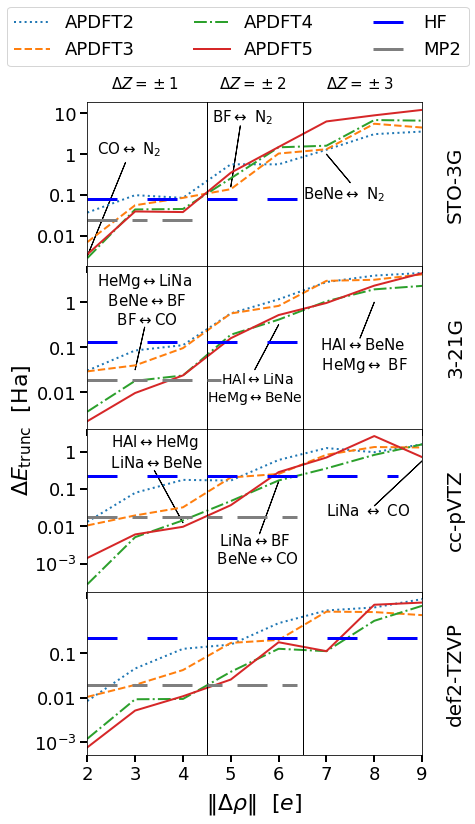

In [44]:
fig=plt.figure(figsize=(6,12))
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.axes().set_ylabel(r"$\Delta E_{\mathrm{trunc}}$  [Ha] ",fontsize=22,labelpad=30)
plt.axes().set_xlabel(r'$\Vert \Delta \rho \Vert $  [$e$] ',fontsize=22,labelpad=20)
plt.axes().set_frame_on(False) 

axs=fig.subplots(4,1,sharex=True)
plt.subplots_adjust(hspace=0)
xmaxs=np.asarray([[4.5,2.5],[5,2.8],[6.5,4.5],[7,4.5]])
for i in range(4):
    bs=basisSets[i*2]
    ax=axs[i]
    for j in range(1,5):
        ao=j
        dt= rho_grouping.query("basis_set==@bs & alchemy==@ao")
     #   slope,intercept=float(linregr_data.query("basis_set==@bs & alchemy==@ao").slope),\
      #                  float(linregr_data.query("basis_set==@bs & alchemy==@ao").intercept)
        ax.plot(dt.delta_rho_int, dt.Log_mae,color='C'+str(ao-1),label="APDFT"+str(ao+1),linestyle=linestyleAO[ao],lw=2)
      #  ax.plot([1.5,9.5],[1.5*slope+intercept,9.5*slope+intercept],color='C'+str(ao),ls='-.',lw=1)
        ax.set_xlim(2,9)
    ax.annotate(correct_bs[bs],[1.1,.5],rotation=90,xycoords='axes fraction',ha='center',va='center',fontsize=20)
    ax.axvline(4.5,color='black',lw=1)
    ax.axvline(6.5,color='black',lw=1)
    ax.tick_params(length=7,width=2.)
    ax.axhline(np.log10(hf_mae[bs]),xmax=xmaxs[i,0]/7,ls=(0,(10,10,10,10)),label="HF",lw=3,color="blue")
    ax.axhline(np.log10(mp2_mae[bs]),xmax=xmaxs[i,1]/7,ls=(0,(10,5,5,5)),label="MP2",lw=3,color="C7")   

#    axs[0].axhline(np.log10(hf_mae[bs]),xmax=4.5/7,ls=(0,(10,10,10,10)),label="HF",lw=1,color="purple")
#    axs[0].axhline(np.log10(mp2_mae[bs]),xmax=2.5/7,ls=(0,(10,5,5,5)),label="MP2",lw=1,color="brown")   
#    axs[1].axhline(np.log10(hf_mae[bs]),xmax=4.7/7,ls=(0,(10,10,10,10)),label="HF",lw=1,color="purple")
#    axs[1].axhline(np.log10(mp2_mae[bs]),xmax=2.7/7,ls=(0,(10,5,5,5)),label="MP2",lw=1,color="brown")
#    axs[2].axhline(np.log10(hf_mae[bs]),ls=(0,(10,10,10,10)),label="HF",lw=1,color="purple")
#    axs[2].axhline(np.log10(mp2_mae[bs]),xmax=4.5/7,ls=(0,(10,5,5,5)),label="MP2",lw=1,color="brown")
#    axs[3].axhline(np.log10(hf_mae[bs]),ls=(0,(10,10,10,10)),label="HF",lw=1,color="purple")
#    axs[3].axhline(np.log10(mp2_mae[bs]),xmax=4.5/7,ls=(0,(10,5,5,5)),label="MP2",lw=1,color="brown")

axs[0].legend(bbox_to_anchor=(-0.25, 1.2, 1.4, .102), loc=3, ncol=3, mode="expand", borderaxespad=0.2,fontsize=18)
#axs[0].legend(loc=(0.15,1.3),ncol=2,fontsize=15)#,xycoords='axes fraction')
axs[0].text(2.5,1.6,r"$\Delta Z=\pm 1$",fontsize=15)
axs[0].text(4.75,1.6,r"$\Delta Z=\pm 2$",fontsize=15)
axs[0].text(7.,1.6,r"$\Delta Z=\pm 3$",fontsize=15)
########################################################à
axs[0].set_yticks([-2,-1,0,1])
axs[0].set_yticklabels(['0.01','0.1','1','10'],fontsize=18)
axs[1].set_yticks([-2,-1,0])
axs[1].set_yticklabels(['0.01','0.1','1'],fontsize=18)
axs[2].set_yticks([-3,-2,-1,0])
axs[2].set_yticklabels(['10$^{-3}$','0.01','0.1','1'],fontsize=18)
axs[3].set_yticks([-3,-2,-1])
axs[3].set_yticklabels(['10$^{-3}$','0.01','0.1'],fontsize=18)
axs[3].set_xticklabels(['2','3','4','5','6','7','8','9'],fontsize=18)
###########################################
#delta Z=1  dR=2,3,4
axs[0].text(2.2,-0.,"CO$\leftrightarrow$ N$_2$",fontsize=15) 
axs[0].arrow(2.8,-0.2,-.8,-2.3)
axs[1].text(2.2,-0.5,"HeMg$\leftrightarrow$LiNa \n BeNe$\leftrightarrow$BF \n BF$\leftrightarrow$CO",multialignment='center',fontsize=15)
axs[1].arrow(3.2,-0.55,-0.2,-.95)
axs[2].text(2.4,-0.43,"HAl$\leftrightarrow$HeMg \n LiNa$\leftrightarrow$BeNe",multialignment='center',fontsize=15)
axs[2].arrow(3.4,-0.5,.6,-1.4,)
#delta Z=2 dR=5,6
axs[0].text(4.6,0.8,"BF$\leftrightarrow$ N$_2$",fontsize=15)
axs[0].arrow(5.2,0.7,-0.2,-1.5)
axs[1].text(4.51,-2.2,"HAl$\leftrightarrow$LiNa \nHeMg$\leftrightarrow $BeNe  ",multialignment='center',fontsize=14)
axs[1].arrow(5.5,-1.5,0.5,1)
axs[2].text(4.6,-3,"LiNa$\leftrightarrow$BF \n BeNe$\leftrightarrow$CO",multialignment='center',fontsize=15)
axs[2].arrow(5.6,-2.2,0.4,1.4)
#delta Z=3 dR=7,8,9
axs[0].text(6.5,-1.1,"BeNe$\leftrightarrow$ N$_2$",fontsize=15)
axs[0].arrow(7.5,-.7,-.5,.7)
axs[1].text(6.8,-1.5,"HAl$\leftrightarrow$BeNe \n HeMg$\leftrightarrow$ BF ",multialignment='center',fontsize=15)
axs[1].arrow(7.7,-.8,.3,.8)
axs[2].text(7.,-1.7,"LiNa $\leftrightarrow$ CO ",fontsize=15)
axs[2].arrow(8.,-1.45,1,1.2)
pp = PdfPages("SI_trunc_err_plot.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close() 